# Task 1: Exploring different ANN architectures

In [1]:
#Although I set these things, still fail to get rid of randomness
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ['TF_CUDNN_USE_AUTOTUNE'] ='0'
import numpy as np
import random as rn
import tensorflow as tf

rn.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

Import training and testing dataset

In [100]:
#Import libraries
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import losses
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import ThresholdedReLU
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras import optimizers
from numpy.random import seed

import matplotlib.pyplot as plt
import tensorflow
import pandas as pd
import numpy as np
import re

In [3]:
#Pre-trained embeddings
file = 'GoogleNews-vectors-negative300.bin' #pathway to the file
word2vec = KeyedVectors.load_word2vec_format(file, binary=True,limit=50000)
word2vec_vectors = word2vec.wv

filename = 'glove.6B.300d.txt.word2vec'
glove = KeyedVectors.load_word2vec_format(filename, binary=False,limit=50000)
glove_vectors=glove.wv

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [4]:
#Training dataset
train = pd.read_csv('train.csv',encoding = "ISO-8859-1")
x_train = train.values[:,0]
y_train = train.values[:,1]

#Testing dataset
test = pd.read_csv('test.csv',encoding = "ISO-8859-1")
x_test = test.values[:,0]
y_test = test.values[:,1]

In [181]:
print(x_train[0:3])

['No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.\r'
 'This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\x89ÛÜ this unreliable product.Thanks.\r'
 'i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connec

In [6]:
print(y_train[0:3])

[3 1 4]


In [7]:
print(x_test[0:3])

['Superb piece\r'
 "It was till date...but one side speaker is now stopped function...it's in the warranty period.....can any one please help me?\r"
 'Sound quality is good with heavy bass, as per calling experience noise cancellation is not working properly.\r']


In [8]:
print(y_test[0:3])

[5 2 4]


## Task1.1.1 Multilayer perceptron (text as single vector)

In [372]:
def getModel(data_train,labels_train):
    model = Sequential()
    model.add(Dense(250, input_dim=300, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros'))
    model.add(Dense(1, activation = 'linear',kernel_initializer='random_uniform', bias_initializer='zeros'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])
    model.fit(data_train,labels_train,epochs=10,batch_size=32, verbose=0)
    return model

In [375]:
#np.set_printoptions(threshold=np.inf)

#set random seed
seed(0)
tensorflow.random.set_seed(0)


#get word2vec manually on training set
w2v_train = []
token=[]
for row in x_train:
    tokens = [w.lower() for w in re.sub(r'[^\w\s]','',row).split(' ')]
    token.append(tokens)
for i in range(3000):
    temp=[]
    for j in range(len(token[i])):
        if token[i][j] in word2vec_vectors:
            temp.append(word2vec[token[i][j]])
    if(temp==[]):
        temp1=np.zeros((300))
        temp.append(temp1)   
    w2v_train.append(np.mean(temp,axis=0))
w2v_train=np.asarray(w2v_train)

#get word2vec manually on testing set
w2v_test = []
token=[]
for row in x_test:
    tokens = [w.lower() for w in re.sub(r'[^\w\s]','',row).split(' ')]
    token.append(tokens)

for i in range(500):
    temp=[]
    for j in range(len(token[i])):
        if token[i][j] in word2vec_vectors:
            temp.append(word2vec[token[i][j]])
    if(temp==[]):
        temp1=np.zeros((300))
        temp.append(temp1)   
    w2v_test.append(np.mean(temp,axis=0))
w2v_test=np.asarray(w2v_test)

#word2vec training
w2v_model = getModel(w2v_train,y_train)
_,e1,e2 = w2v_model.evaluate(w2v_test,y_test)
print("Word2Vex MSE",e1,"MAE",e2)



#get glove manually on training set
glv_train = []
token=[]
for row in x_train:
    tokens = [w.lower() for w in re.sub(r'[^\w\s]','',row).split(' ')]
    token.append(tokens)

for i in range(3000):
    temp=[]
    for j in range(len(token[i])):
        if token[i][j] in glove_vectors:
            temp.append(glove[token[i][j]])
    if(temp==[]):
        temp1=np.zeros((300))
        temp.append(temp1)   
    glv_train.append(np.mean(temp,axis=0))
glv_train=np.asarray(glv_train)

#get glove manually on testing set
glv_test = []
token=[]
for row in x_test:
    tokens = [w.lower() for w in re.sub(r'[^\w\s]','',row).split(' ')]
    token.append(tokens)

for i in range(500):
    temp=[]
    for j in range(len(token[i])):
        if token[i][j] in glove_vectors:
            temp.append(glove[token[i][j]])
    if(temp==[]):
        temp1=np.zeros((300))
        temp.append(temp1)   
    glv_test.append(np.mean(temp,axis=0))
glv_test=np.asarray(glv_test)

glv_model = getModel(glv_train,y_train)
_,e1,e2 = glv_model.evaluate(glv_test,y_test)
print("Glove MSE",e1,"MAE",e2)


500/500 [==============================] - 0s 56us/step
Word2Vex MSE 1.3115991353988647 MAE 0.9164566993713379
500/500 [==============================] - 0s 56us/step
Glove MSE 1.2511322498321533 MAE 0.893415629863739


## Task1.1.2 Multilayer perceptron (text as sequence)

In [196]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r', lower=True,split=' ')
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

In [197]:
num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

In [198]:
embedding_matrix.shape

(5924, 300)

In [199]:
tokenizer.word_index.items()

dict_items([('is', 1), ('the', 2), ('it', 3), ('and', 4), ('i', 5), ('good', 6), ('for', 7), ('to', 8), ('sound', 9), ('quality', 10), ('this', 11), ('product', 12), ('not', 13), ('a', 14), ('of', 15), ('in', 16), ('but', 17), ('battery', 18), ('very', 19), ('with', 20), ('bass', 21), ('you', 22), ('on', 23), ('one', 24), ('are', 25), ('price', 26), ('have', 27), ('my', 28), ('that', 29), ('boat', 30), ('after', 31), ('at', 32), ('as', 33), ('if', 34), ("it's", 35), ('also', 36), ('was', 37), ('so', 38), ('earphones', 39), ('life', 40), ('working', 41), ('its', 42), ('bluetooth', 43), ('from', 44), ('only', 45), ('great', 46), ('use', 47), ('noise', 48), ('ear', 49), ('can', 50), ('when', 51), ('earphone', 52), ('no', 53), ('just', 54), ('best', 55), ('all', 56), ('using', 57), ('got', 58), ('range', 59), ('be', 60), ('awesome', 61), ('buy', 62), ('2', 63), ('music', 64), ('5', 65), ('too', 66), ('cancellation', 67), ('while', 68), ('like', 69), ('will', 70), ('time', 71), ('other', 72

In [200]:
#find max length
length = []
for x in x_train:
    length.append(len(x.split()))
print(max(length))

#padding training dataset
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=340)
x_train_seq[:5]

#padding testing dataset
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=340)

323


C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as ThresholdedReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 500 samples
Epoch 1/10
 - 43s - loss: 2.8013 - mse: 2.8013 - mae: 1.3133 - val_loss: 1.5656 - val_mse: 1.5656 - val_mae: 1.0820
Epoch 2/10
 - 45s - loss: 1.1117 - mse: 1.1117 - mae: 0.7980 - val_loss: 1.2198 - val_mse: 1.2198 - val_mae: 0.9252
Epoch 3/10
 - 45s - loss: 0.6692 - mse: 0.6692 - mae: 0.5646 - val_loss: 1.1677 - val_mse: 1.1677 - val_mae: 0.8474
Epoch 4/10
 - 45s - loss: 0.5277 - mse: 0.5277 - mae: 0.4677 - val_loss: 1.0331 - val_mse: 1.0331 - val_mae: 0.8060
Epoch 5/10
 - 45s - loss: 0.3297 - mse: 0.3297 - mae: 0.3832 - val_loss: 1.2923 - val_mse: 1.2923 - val_mae: 0.9333
Epoch 6/10
 - 44s - loss: 0.2468 - mse: 0.2468 - mae: 0.3261 - val_loss: 1.0755 - val_mse: 1.0755 - val_mae: 0.8450
Epoch 7/10
 - 44s - loss: 0.2299 - mse: 0.2299 - mae: 0.2922 - val_loss: 1.0687 - val_mse: 1.0687 - val_mae: 0.8183
Epoch 8/10
 - 46s - loss: 0.2425 - mse: 0.2425 - mae: 0.3197 - val_loss: 1.0528 - val_mse: 1.0528 - val_mae: 0.8029
Epoch 9/10
 - 44s - loss:

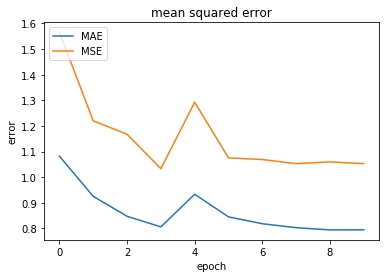

In [203]:
seed(0)
tensorflow.random.set_seed(0)
model = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=340, trainable=True)
model.add(e)
model.add(Flatten())
model.add(Dense(250, activation=ThresholdedReLU(),kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(200, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mean_squared_error', optimizer='nadam',metrics=['mse','mae'])
history = model.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)
prediction=model.predict(x_train_seq)

plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

#graph
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('training mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## Task1.2 Convolutional Neural Network

In [205]:
from keras.layers import Conv1D, GlobalMaxPooling1D

In [207]:
from keras.layers import SeparableConv1D,Cropping1D,UpSampling1D,ZeroPadding1D

In [212]:
from keras.layers import MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D

323


C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 500 samples
Epoch 1/9
 - 18s - loss: 1.5596 - mse: 1.5596 - mae: 0.9846 - val_loss: 0.9228 - val_mse: 0.9228 - val_mae: 0.7514
Epoch 2/9
 - 18s - loss: 0.6412 - mse: 0.6412 - mae: 0.6215 - val_loss: 1.4631 - val_mse: 1.4631 - val_mae: 0.9611
Epoch 3/9
 - 18s - loss: 0.3513 - mse: 0.3513 - mae: 0.4603 - val_loss: 0.9108 - val_mse: 0.9108 - val_mae: 0.7564
Epoch 4/9
 - 19s - loss: 0.2544 - mse: 0.2544 - mae: 0.3920 - val_loss: 0.9868 - val_mse: 0.9868 - val_mae: 0.7587
Epoch 5/9
 - 20s - loss: 0.1805 - mse: 0.1805 - mae: 0.3272 - val_loss: 0.8545 - val_mse: 0.8545 - val_mae: 0.7069
Epoch 6/9
 - 19s - loss: 0.1217 - mse: 0.1217 - mae: 0.2641 - val_loss: 1.1117 - val_mse: 1.1117 - val_mae: 0.8252
Epoch 7/9
 - 25s - loss: 0.1017 - mse: 0.1017 - mae: 0.2407 - val_loss: 0.8880 - val_mse: 0.8880 - val_mae: 0.7190
Epoch 8/9
 - 20s - loss: 0.0835 - mse: 0.0835 - mae: 0.2201 - val_loss: 0.8722 - val_mse: 0.8722 - val_mae: 0.7158
Epoch 9/9
 - 21s - loss: 0.0880 -

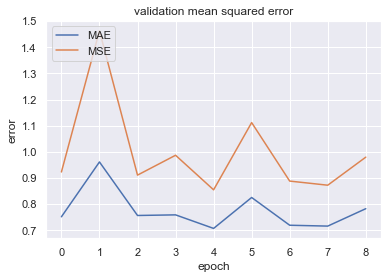

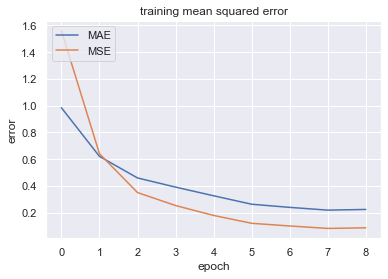

In [377]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r', lower=True,split=' ')
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

#In order to get more percise result, everytime we build the embedding matrix again
num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
        
#find max length
length = []
for x in x_train:
    length.append(len(x.split()))
print(max(length))

#padding training dataset
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=340)
x_train_seq[:5]

#padding testing dataset
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=340)

#model
cnn = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=340, trainable=True)
cnn.add(e)
cnn.add(Conv1D(128, 5, activation=PReLU(),use_bias=False, padding='same',kernel_initializer='random_uniform', bias_initializer='zeros'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1, activation='relu'))
cnn.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mse','mae'])
history=cnn.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=9, batch_size=32, verbose=2)

#graph
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('validation mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

#graph
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('training mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## Task1.3 Recurrent Neural Network

In [11]:
from keras.layers import SimpleRNN, GRU,LSTM, Dropout, Masking

In [9]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r', lower=True,split=' ')
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

323


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 500 samples
Epoch 1/10
 - 39s - loss: 3.3816 - mse: 3.3817 - mae: 1.4243 - val_loss: 1.1708 - val_mse: 1.1708 - val_mae: 0.8806
Epoch 2/10
 - 38s - loss: 0.9441 - mse: 0.9441 - mae: 0.7660 - val_loss: 0.9390 - val_mse: 0.9390 - val_mae: 0.7747
Epoch 3/10
 - 38s - loss: 0.5777 - mse: 0.5777 - mae: 0.5873 - val_loss: 0.9514 - val_mse: 0.9514 - val_mae: 0.7668
Epoch 4/10
 - 40s - loss: 0.4189 - mse: 0.4189 - mae: 0.4888 - val_loss: 0.9109 - val_mse: 0.9109 - val_mae: 0.7180
Epoch 5/10
 - 38s - loss: 0.3199 - mse: 0.3199 - mae: 0.4214 - val_loss: 0.9090 - val_mse: 0.9090 - val_mae: 0.7270
Epoch 6/10
 - 38s - loss: 0.2470 - mse: 0.2470 - mae: 0.3668 - val_loss: 0.9451 - val_mse: 0.9451 - val_mae: 0.7218
Epoch 7/10
 - 43s - loss: 0.2118 - mse: 0.2118 - mae: 0.3376 - val_loss: 0.9373 - val_mse: 0.9373 - val_mae: 0.6939
Epoch 8/10
 - 42s - loss: 0.1664 - mse: 0.1664 - mae: 0.2984 - val_loss: 0.9805 - val_mse: 0.9805 - val_mae: 0.7172
Epoch 9/10
 - 43s - loss:

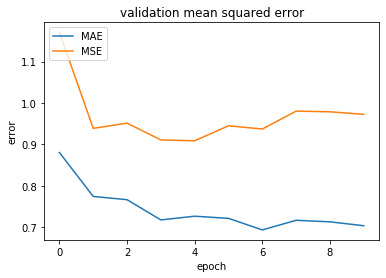

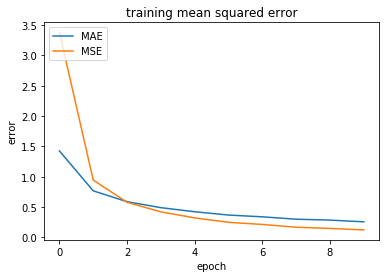

In [26]:
#In order to get more percise result, everytime we build the embedding matrix again
num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
        
#find max length
length = []
for x in x_train:
    length.append(len(x.split()))
print(max(length))

#padding training dataset
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=340)
x_train_seq[:5]

#padding testing dataset
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=340)

#model
rnn = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=340, trainable=True)
rnn.add(e)
rnn.add(LSTM(64,recurrent_activation='tanh',return_sequences=False, dropout=0.2, recurrent_dropout=0.1))
rnn.add(Dense(50, activation='relu'))
rnn.add(Dense(1, activation='linear'))
rnn.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mse','mae'])
history=rnn.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

#graph
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('validation mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

#graph
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('training mean squared error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Task 2: Choosing the final solution

In [159]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn
from keras.layers import Conv1D, MaxPooling1D,GlobalMaxPooling1D,Dropout
from keras import regularizers
from keras.constraints import max_norm
from keras.utils import to_categorical

In [91]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r', lower=True,split=' ')
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

#In order to get more percise result, everytime we build the embedding matrix again
num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
        
#find max length
length = []
for x in x_train:
    length.append(len(x.split()))
print(max(length))

#padding training dataset
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=340)
x_train_seq[:5]

#padding testing dataset
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=340)

#model
cnn = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=340, trainable=True)
cnn.add(e)
cnn.add(Conv1D(128, 5, activation=PReLU(),use_bias=False, padding='same',kernel_initializer='random_uniform', bias_initializer='zeros'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1, activation='relu'))
cnn.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mse','mae'])
history=cnn.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=9, batch_size=32, verbose=2)
prediction=cnn.predict(x_test_seq)

323


C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 500 samples
Epoch 1/9
 - 18s - loss: 1.5851 - mse: 1.5851 - mae: 0.9763 - val_loss: 0.9160 - val_mse: 0.9160 - val_mae: 0.7485
Epoch 2/9
 - 23s - loss: 0.6107 - mse: 0.6107 - mae: 0.6024 - val_loss: 1.0209 - val_mse: 1.0209 - val_mae: 0.7847
Epoch 3/9
 - 19s - loss: 0.3770 - mse: 0.3770 - mae: 0.4811 - val_loss: 0.9283 - val_mse: 0.9283 - val_mae: 0.7452
Epoch 4/9
 - 18s - loss: 0.2497 - mse: 0.2497 - mae: 0.3884 - val_loss: 0.9056 - val_mse: 0.9056 - val_mae: 0.7209
Epoch 5/9
 - 18s - loss: 0.1538 - mse: 0.1538 - mae: 0.3009 - val_loss: 0.8866 - val_mse: 0.8866 - val_mae: 0.7204
Epoch 6/9
 - 18s - loss: 0.1223 - mse: 0.1223 - mae: 0.2686 - val_loss: 0.8676 - val_mse: 0.8676 - val_mae: 0.7139
Epoch 7/9
 - 18s - loss: 0.1130 - mse: 0.1130 - mae: 0.2590 - val_loss: 0.9916 - val_mse: 0.9916 - val_mae: 0.7891
Epoch 8/9
 - 18s - loss: 0.1029 - mse: 0.1029 - mae: 0.2449 - val_loss: 0.9104 - val_mse: 0.9104 - val_mae: 0.7352
Epoch 9/9
 - 19s - loss: 0.0941 -

[5.5721974  3.6816075  3.4741457  4.9203286  3.772814   4.7807856
 3.0125244  4.5004516  3.5113127  2.8641455  4.9715447  5.0920787
 3.0234654  2.8316581  4.414627   4.5797877  4.9660983  2.4219825
 4.0837283  4.6375003  4.638648   3.0625699  1.2478698  1.5219721
 2.8217163  4.873014   4.764304   1.2232925  4.13139    3.8683288
 1.0604317  3.8870623  4.158398   4.2052526  5.416687   2.4201403
 1.4366741  2.2955427  4.6811213  4.210048   4.458608   4.4960165
 5.371832   4.73178    3.125501   4.684682   1.488045   4.7952065
 4.553692   4.670614   1.5100286  5.1159024  3.7251027  4.933686
 3.1612856  4.27249    3.8514092  4.2143435  5.0885797  4.947663
 3.0216792  2.8738568  4.244386   4.6961207  5.298055   2.7665815
 3.7882817  4.339906   4.7810874  3.470265   4.3021736  4.3021736
 1.6921111  3.3770053  3.3189347  3.1592958  4.615619   4.944748
 2.149154   4.4960165  1.5059086  2.853262   4.867772   0.7603028
 1.092471   1.220043   4.999526   3.9122596  4.746364   3.438198
 4.7194867  5.

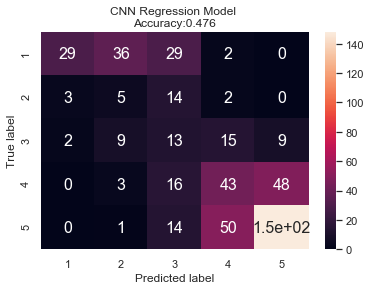

In [92]:
#labels fills in confusion matrix
labelss=[1,2,3,4,5]

#output data pre-processing
prediction1=prediction.flatten()
print(prediction1)
prediction2=np.rint(prediction1)
prediction2=prediction2.astype(np.int)

#true data pre-processing
test_label=y_test.astype(np.int)
print(prediction2)

#generate confusion matrix
report=metrics.confusion_matrix(test_label,prediction2,labels=labelss)
print(report)
df_cm=pd.DataFrame(report,index=[1,2,3,4,5],columns=[1,2,3,4,5])
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

#plot heatmap 
plt.title('CNN Regression Model \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(test_label, prediction2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [98]:
#Test Accuracy
test_accuracy=np.sum(test_label==prediction2)/test_label.shape[0]
print(f"Validation accuracy: {test_accuracy}")

#classification report
print(metrics.classification_report(y_true=test_label,y_pred=prediction2,labels=labelss))

Validation accuracy: 0.476
              precision    recall  f1-score   support

           1       0.85      0.30      0.45        96
           2       0.09      0.21      0.13        24
           3       0.15      0.27      0.19        48
           4       0.38      0.38      0.38       113
           5       0.72      0.68      0.70       219

   micro avg       0.48      0.48      0.48       500
   macro avg       0.44      0.37      0.37       500
weighted avg       0.59      0.48      0.50       500



In [173]:
y_train_label=to_categorical(y_train)
y_test_label=to_categorical(y_test)

tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r', lower=True,split=' ')
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

#In order to get more percise result, everytime we build the embedding matrix again
num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
        
#find max length
length = []
for x in x_train:
    length.append(len(x.split()))
print(max(length))

#padding training dataset
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=340)

#padding testing dataset
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=340)

#model
cnn = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=340, trainable=True)
cnn.add(e)
cnn.add(Conv1D(128, 5, activation=PReLU(),use_bias=False, kernel_regularizer=regularizers.l2(0.05)))
cnn.add(Dropout(0.4))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(6, activation='softmax'))
cnn.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history=cnn.fit(x_train_seq, y_train_label, validation_data=(x_test_seq,y_test_label),epochs=10, batch_size=128, verbose=2)

323


C:\ProgramData\Anaconda3\lib\site-packages\keras\activations.py:235: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3000 samples, validate on 500 samples
Epoch 1/10
 - 17s - loss: 6.9489 - accuracy: 0.3327 - val_loss: 3.7071 - val_accuracy: 0.5400
Epoch 2/10
 - 18s - loss: 2.4908 - accuracy: 0.4763 - val_loss: 1.7145 - val_accuracy: 0.5660
Epoch 3/10
 - 18s - loss: 1.4589 - accuracy: 0.5193 - val_loss: 1.3441 - val_accuracy: 0.5760
Epoch 4/10
 - 19s - loss: 1.2667 - accuracy: 0.5493 - val_loss: 1.2396 - val_accuracy: 0.6040
Epoch 5/10
 - 18s - loss: 1.2095 - accuracy: 0.5630 - val_loss: 1.2189 - val_accuracy: 0.6280
Epoch 6/10
 - 18s - loss: 1.1445 - accuracy: 0.5997 - val_loss: 1.2000 - val_accuracy: 0.5980
Epoch 7/10
 - 18s - loss: 1.1036 - accuracy: 0.6340 - val_loss: 1.1953 - val_accuracy: 0.6400
Epoch 8/10
 - 18s - loss: 1.0673 - accuracy: 0.6417 - val_loss: 1.1978 - val_accuracy: 0.6380
Epoch 9/10
 - 18s - loss: 1.0190 - accuracy: 0.6763 - val_loss: 1.2065 - val_accuracy: 0.5980
Epoch 10/10
 - 18s - loss: 0.9842 - accuracy: 0.6960 - val_loss: 1.1866 - val_accuracy: 0.6180


[5 1 4 5 4 5 3 5 1 3 5 5 1 1 5 5 5 1 5 5 5 1 1 1 1 5 5 1 4 5 1 4 5 5 5 3 1
 1 5 4 4 5 5 5 5 5 1 5 5 5 1 5 1 5 4 5 5 5 5 5 5 1 5 5 5 1 5 4 5 5 5 5 1 4
 4 1 4 4 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 4 5 5 5 5 5 5 5 4 5 5 5 5 5 5
 5 5 1 4 5 1 5 5 1 1 1 1 5 5 3 5 5 3 5 5 3 4 5 2 5 1 4 5 5 5 5 5 4 5 5 1 4
 1 1 1 1 1 5 1 4 1 5 5 4 5 5 5 5 5 1 5 5 5 5 5 3 5 1 4 5 5 5 3 4 1 5 5 1 5
 3 5 4 5 5 5 5 1 5 5 1 4 5 5 1 5 5 5 5 5 4 1 5 1 5 1 1 5 1 1 5 5 4 5 5 1 1
 5 4 4 1 5 5 1 4 4 5 5 5 3 4 5 5 5 3 5 5 5 1 4 4 5 5 5 5 4 4 3 5 1 1 5 1 5
 4 5 5 4 5 1 5 1 5 4 5 4 4 5 1 5 3 5 5 1 3 5 5 1 5 5 4 1 1 5 5 5 5 4 1 5 5
 5 1 5 5 5 1 3 1 5 5 4 5 5 1 1 1 1 1 1 4 5 5 3 5 1 5 5 5 5 1 5 3 5 5 4 5 5
 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 5 5 3 3 5 5 3 4 4 1 5 5 5 5 5 4 5 3 5 5 4 5
 5 5 1 5 5 1 5 5 1 5 5 5 5 1 1 5 1 5 4 5 5 1 5 3 1 5 4 5 5 5 5 5 1 4 5 5 5
 1 5 5 5 5 5 5 5 1 4 5 5 5 1 1 5 1 5 5 1 1 4 2 5 5 1 5 3 5 1 3 5 1 5 5 5 5
 5 5 5 3 5 5 4 5 5 4 1 5 1 5 5 5 1 1 5 5 5 5 5 1 5 5 1 1 1 5 1 5 5 5 5 5 1
 5 1 5 5 1 1 1 1 5 5 5 5 

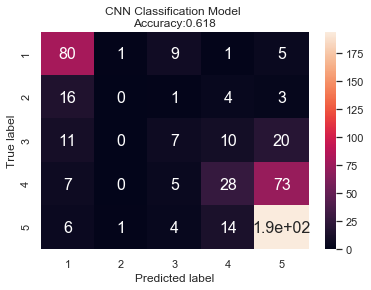

In [179]:
#labels fills in confusion matrix
labelss=[1,2,3,4,5]

#output data pre-processing
prediction1=cnn.predict_classes(x_test_seq)
print(prediction1)

#true data pre-processing
test_label=y_test.astype(np.int)
print(test_label)

#generate confusion matrix
report=metrics.confusion_matrix(test_label,prediction1,labels=labelss)
print(report)
df_cm=pd.DataFrame(report,index=[1,2,3,4,5],columns=[1,2,3,4,5])
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

#plot heatmap 
plt.title('CNN Classification Model \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(test_label, prediction1)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()